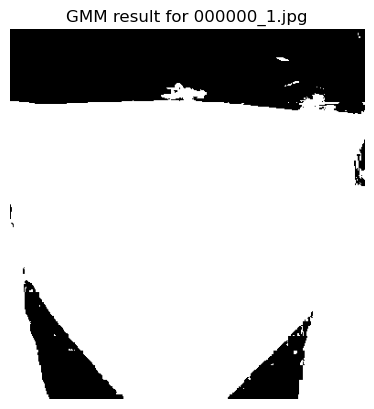

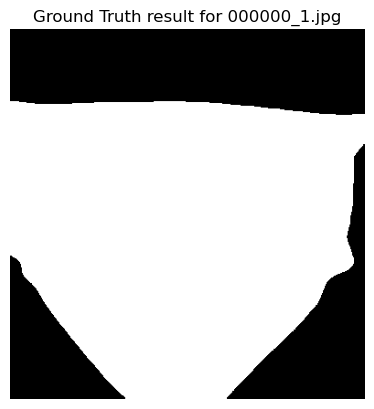

0.8657636522424097
Average Jaccard score: 0.8657636522424097


In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import jaccard_score
import cv2
import os
from matplotlib import pyplot as plt

# Path to the dataset and segmentation results
# path_to_data = '../../proj_try/dataset2/1/face_crop/'
# path_to_segmented_op = '../../proj_try/dataset2/1/face_crop_segmentation/'

path_to_data = '../datasets/dataset2/1/face_crop/'
path_to_segmented_op = '../datasets/dataset2/1/face_crop_segmentation/'


image_names = os.listdir(path_to_data)
image_names = sorted(image_names)
ans_names = os.listdir(path_to_segmented_op)
ans_names = sorted(ans_names)

def segment_image(img_name, ans_name, show=False, save=True):
    # Takes in one image and returns the segmented output i.e. seg and also returns the Jaccard score
    img = cv2.imread(path_to_data + img_name)
    seg = cv2.imread(path_to_segmented_op + ans_name)
    
    # Get the original shape of the image
    original_shape = img.shape
    original_shape = original_shape[:2]
    
    # Reshape image into a 2D array (each pixel as a feature vector)
    img = img.reshape(-1, 3)
    
    # Create and fit the Gaussian Mixture Model (GMM)
    gmm = GaussianMixture(n_components=2, random_state=17)
    gmm.fit(img)
    
    # Predict the labels for each pixel (0 or 1, corresponding to the two components)
    labels = gmm.predict(img)
    
    # Process the segmentation mask
    seg = seg.reshape(-1, 3)
    seg2 = np.zeros((seg.shape[0]))
    
    # Convert the segmented mask to binary (1 for mask, 0 for non-mask)
    for i in range(seg.shape[0]):
        val = seg[i][0]
        if abs(255 - val) < abs(val - 0):
            val = 1  # Mask area
        else:
            val = 0  # Non-mask area
        seg2[i] = val

    seg = seg2
    
    # Calculate Jaccard score (intersection over union) for both possible labelings
    s1 = jaccard_score(y_true=seg, y_pred=labels)
    s2 = jaccard_score(y_true=seg, y_pred=1 - labels)
    
    # Choose the best Jaccard score
    score = max(s1, s2)

    # If necessary, flip the labels to match the mask region
    if s1 < s2:
        labels = 1 - labels
    
    # Show the results if required
    if show:
        plt.title('GMM result for ' + img_name)
        plt.axis('off')
        plt.imshow(labels.reshape(original_shape), cmap='gray')
        plt.show()
        plt.close()

        plt.title('Ground Truth result for ' + ans_name)
        plt.axis('off')
        plt.imshow(seg.reshape(original_shape), cmap='gray')
        plt.show()
        plt.close()

    # Save the results to a file if required
    if save:
        plt.title('Segmentation result for ' + img_name)
        plt.axis('off')
        plt.imshow(labels.reshape(original_shape), cmap='gray')
        plt.savefig(f'./output/gmm/{img_name}')
        plt.close()

    return (seg.reshape(original_shape), score)

# Calculate average Jaccard score over a set of images
tot = 0
count = 1
for i in range(0, count):
    seg_pred, score = segment_image(image_names[i], ans_names[i], show=True, save=True)
    print(score)
    tot += score

print('Average Jaccard score:', tot / count)
